# 1. 회귀 (Regression)

* ( 분류 )는 범주형 클래스 값을 예측하고, ( 회귀 )는 연속적인 숫자값을 예측합니다.

* ( 회귀 분석 ) : 독립변수와 종속변수 간의 상관관계를 분석하는 방법 [위키백과](https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D)

  * ( 단순 회귀 ) : 하나의 종속변수와 하나의 독립변수 사이의 관계를 분석
  * ( 다중 회귀 ) : 하나의 종속변수와 여러 독립변수 사이의 관계를 분석할 경우

* 아파트 가격 예측을 예로 들어봅시다. 아파트 가격에 영향을 주는 요소에는 집크기, 방개수, 주변학군 등 여러가지가 있습니다. 

  * 집크기, 방개수, 주변학군, 역과의 거리 등 : X1, X2, X3 .. Xn (독립변수)
  * 아파트 가격 : y (종속변수)

  * 독립변수가 종속변수에 어떻게 영향을 미치는가를 식으로 나타내면?
  * y = W1 * X1 + W2 * X2 + W3 * X3 + .. Wn * Xn + W0
  * W1, W2, W3 .. Wn : 독립변수의 값에 영향을 미치는 회귀 계수(coefficients)
  * W0 : 절편(intercept)

* 머신러닝 회귀의 핵심은 주어진 X값과 y값으로 학습을 통해 최적의 회귀 계수를 찾아내는 것입니다.

# 2. 선형 회귀

* 주택 가격이 주택 크기로만 결정된다고 가정하면, 예측값 y_hat= a * X + b로 계산할 수 있습니다.

* 실제값과 회귀 모델의 차이에 따른 오류값을 오류(error) 또는 잔차(residual)라고 부릅니다.

* 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 오류(잔차)합이 최소가 되는 모델을 만든다는 의미입니다.

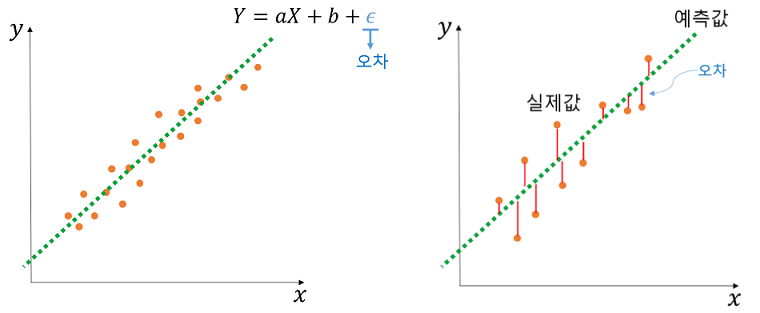

* 어떻게 하면 오류의 합이 최소가 되는 최적의 계수를 찾을 수 있을까요?

* 전체 데이터의 오류합을 더해 최소가 되는 모델을 찾는다면? ( 부호가 다른 오차끼리 더하면 서로 상쇄됨 )

* 음수를 없앨 수 있는 방법은? ( 제곱 또는 절댓값 )

* 절대값 이용하기

  * MAE(Mean Absolute Error, 평균 절대 오차) : 오차의 절대값의 평균 [위키백과](https://en.wikipedia.org/wiki/Mean_absolute_error)

  * MAE는 에러에 절대값을 취하기 때문에 에러의 크기 그대로 반영되므로 직관적임

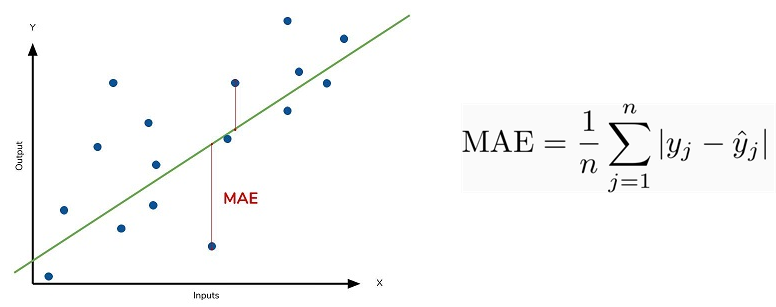

* 제곱값 이용하기

  * MSE (Mean Squared Error, 평균 제곱 오차) : 오차의 제곱의 평균 [위키백과](https://en.wikipedia.org/wiki/Mean_squared_error)

  * MSE는 잔차 값에 대한 제곱을 구하기 때문에(=넓이) 큰 값에 대해 벌점이 크게 매겨진다. 잔차를 제곱하기 때문에 오차의 합이 너무 커질 수가 있고, 특히 이상치에 민감하게 됩니다.

  * 이상치에 Robust하게 만들기 위해 MSE에 루트를 씌워주거나 로그를 적용해줍니다.

  * RMSE (Root Mean Squared Error, 평균 제곱 오차 제곱근) : MSE에 루트를 씌움

  * MSLE (Mean Squared Log Error) : MSE에 로그를 적용함

  * RMSLE (Root Mean Squared Log Error) : 실제값과 예측값에 로그를 취해 RMSE를 구함

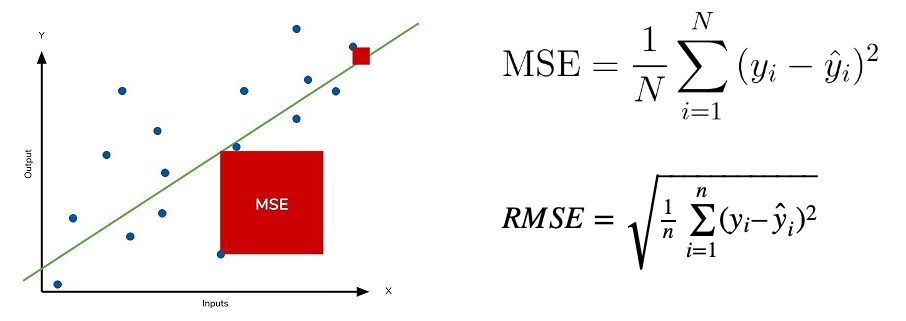

* 오류값을 지속적으로 감소시켜 더이상 감소하지 않도록 계산하려면 하나의 함수식이 필요합니다. 이 함수를 (비용함수, 손실함수, Cost Function)이라고 합니다.

* 선형 회귀의 비용 함수로 주로 MSE를 사용합니다.

  * 오차가 큰 경우에 더 큰 가중치를 주어 학습을 빠르게 처리함
  
  * 볼록함수(Convex Function)로 만들어 최적의 가중치를 효과적으로 찾기 위함

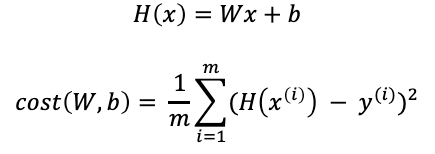

# 3. 비용 최소화하기

* 안개가 자욱해서 한치 앞도 보이지 않는 산꼭대기에 여러분이 있다고 생각해봅시다. 어떻게 산 아래로 내려올 수 있을까요?

* 경사하강법(Gradient Descent) : **점진적으로** 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류값이 최소가 되는 W 파라미터를 구하는 방식 [위키백과](https://ko.wikipedia.org/wiki/%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95)

* 최초 오류값이 100이었다면 두번째 오류값은 100보다 작은 90, 세번째는 80과 같은 방식으로 지속적으로 오류를 감소시키는 방향으로 W값을 업데이트해 나갑니다. 

* 오류값이 더 이상 작아지지 않으면 그 오류값을 최소 비용으로 판단하고 그 때의 W 값을 최적의 파라미터로 반환합니다.

* 어떻게 하면 비용함수가 최소인 W값을 찾을 수 있을까요?

  * 첫번째로 아래 2차 함수에서 시작점을 고릅니다. (시작점은 랜덤하게 고름)

  * 시작점에서 Gradient(기울기, 경사도)를 계산합니다. (미분 이용)

  * Gradient가 +값이면 왼쪽으로, -값이면 오른쪽으로 이동하여 next point를 찾습니다.

  * next point는 gradient에 learning rate(step size)를 곱해서 결정합니다. (예를 들어 gradient가 2.5이고, learning rate가 0.01일 경우 이전 point로부터 0.025 떨어진 점을 선택함)

  * [Learning Rate 살펴보기](https://developers.google.com/machine-learning/crash-course/fitter/graph?hl=ko)

  * 위 작업을 반복하면서 미분된 1차 함수의 gradient값이 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 W를 반환합니다.

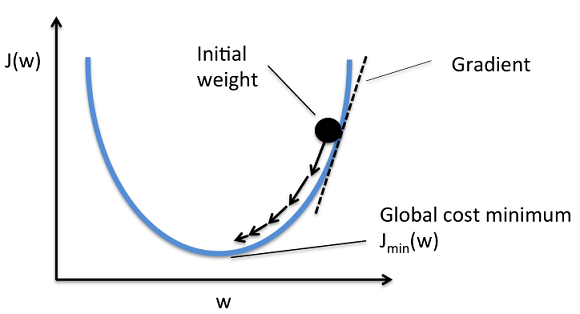

# 4. 선형회귀 실습하기

* 문제 정의 : 키에 대한 몸무게를 예측해 봅시다.

* 데이터 수집 : [캐글](https://www.kaggle.com/tmcketterick/heights-and-weights)

In [1]:
# 데이터 가져오기
import numpy as np
import pandas as pd

df = pd.read_csv('./height_weight/data.csv')
df.shape

(15, 2)

In [2]:
# 데이터 확인하기
df.head()

Height  Weight
0    1.47   52.21
1    1.50   53.12
2    1.52   54.48
3    1.55   55.84
4    1.57   57.20

In [3]:
# 열 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


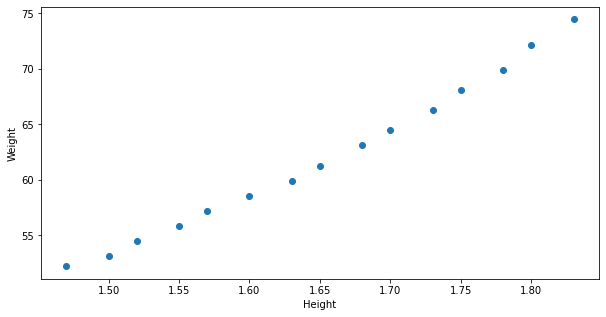

In [4]:
# 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(df.Height, df.Weight)
plt.show()

In [5]:
# 입력데이터(독립변수) : 2차원 array
# 타겟데이터(종속변수) : 1차원 array
input = df[['Height']].to_numpy()  # df['Height'].to_numpy().reshape(-1, 1)도 동일
target = df['Weight'].to_numpy()
input, target

(array([[1.47],
        [1.5 ],
        [1.52],
        [1.55],
        [1.57],
        [1.6 ],
        [1.63],
        [1.65],
        [1.68],
        [1.7 ],
        [1.73],
        [1.75],
        [1.78],
        [1.8 ],
        [1.83]]),
 array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
        64.47, 66.28, 68.1 , 69.92, 72.19, 74.46]))

In [6]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=11)
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [7]:
# 선형회귀 학습하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# 선형회귀 예측하기
pred = lr.predict(X_test)
comparing = pd.DataFrame({
    'Actual': y_test,
    'Pred': pred,
    'Error': y_test - pred
})
comparing

Actual       Pred     Error
0   63.11  63.762489 -0.652489
1   55.84  56.021875 -0.181875
2   74.46  72.693966  1.766034

In [9]:
# 회귀 계수 확인하기
lr.coef_, lr.intercept_

(array([59.54318018]), -36.27005412557133)

In [10]:
# 내 키로 몸무게 예측하기
lr.predict([[1.72]])

array([66.14421578])

In [11]:
# y = Wx + b
59.54318018 * 1.72 - 36.27005412557133

66.14421578402866

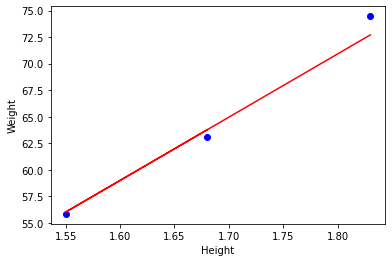

In [12]:
# 테스트 데이터와 회귀선 그리기
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, pred, color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# 5. 선형회귀 평가지표

* MAE, MSE, RMSE : 데이터의 scale에 따라 값이 달라짐, 0에 가까울수록 좋은 모델

* R-Squared(결정계수) : 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 지표 [위키백과](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98)

* R-Squared는 종속변수와 독립변수 사이에 상관관계가 높을수록 1에 가까워집니다. 즉, 1에 가까울수록 예측 정확도가 높습니다.

a.JPG

In [13]:
# 선형회귀 모델 평가하기
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('MSE: %f, RMSE: %f, MAE: %f, R2: %f' % (mse, rmse, mae, r2))

MSE: 1.192566, RMSE: 1.092047, MAE: 0.866799, R2: 0.979687


In [14]:
print(lr.score(X_train, y_train))  # R-Squared 리턴
print(lr.score(X_test, y_test))

0.9908895194994568
0.9796867854704879
